# NAME SHOAIB FAROOQ

# Reg 21I-2278

# Libraries

In [124]:
#for operation on numpy array
import numpy as np
#for operation on datafram
import pandas as pd
#operation on string of curous
import string
#for calculation cosin 
from scipy.spatial.distance import cosine
#for draw different plot 
import matplotlib.pyplot as plt
#for access stop words
from nltk.corpus import stopwords

# Import Data File

In [125]:
with open('Data.txt') as f:
    contents = f.read()
    contents= contents.replace("'",' ').lower().split()
    contents.remove('etc.')
    print(contents)
print(len(contents))

['today', 'we', 'will', 'be', 'learning', 'about', 'the', 'fundamentals', 'of', 'data', 'science', 'and', 'statistics.', 'data', 'science', 'and', 'statistics', 'are', 'hot', 'and', 'growing', 'fields', 'with', 'alternative', 'names', 'of', 'machine', 'learning,', 'artificial', 'intelligence,', 'big', 'data,', 'i', 'm', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics', 'because', 'data', 'science', 'and', 'statistics', 'have', 'long', 'been', 'passions', 'of', 'mine.', 'i', 'didn', 't', 'use', 'to', 'be', 'very', 'good', 'at', 'data', 'science', 'and', 'statistics', 'but', 'after', 'studying', 'data', 'science', 'and', 'statistics', 'for', 'a', 'long', 'time,', 'i', 'got', 'better', 'and', 'better', 'at', 'it', 'until', 'i', 'became', 'a', 'data', 'science', 'and', 'statistics', 'expert.', 'i', 'm', 'really', 'excited', 'to', 'talk', 'to', 'you', 'about', 'data', 'science', 'and', 'statistics,', 'thanks', 'for', 'listening', 'to', 'me', 't

# Rempve Stop Words

In [126]:
stop_words = set(stopwords.words("english"))
#filtring Taken Place
filtered_list = [word for word in contents if word.casefold() not in stop_words]
print(len(filtered_list))
print(filtered_list)

63
['today', 'learning', 'fundamentals', 'data', 'science', 'statistics.', 'data', 'science', 'statistics', 'hot', 'growing', 'fields', 'alternative', 'names', 'machine', 'learning,', 'artificial', 'intelligence,', 'big', 'data,', 'really', 'excited', 'talk', 'data', 'science', 'statistics', 'data', 'science', 'statistics', 'long', 'passions', 'mine.', 'use', 'good', 'data', 'science', 'statistics', 'studying', 'data', 'science', 'statistics', 'long', 'time,', 'got', 'better', 'better', 'became', 'data', 'science', 'statistics', 'expert.', 'really', 'excited', 'talk', 'data', 'science', 'statistics,', 'thanks', 'listening', 'talk', 'data', 'science', 'statistics']


# Data Prepration

In [127]:
#definr=e window size
Window_Size = 3
#for random semple selection
Negative_Sample_count=3
#contain combinations of negative and positive sample
Data=[]
#loop for find index and center word from text
for indx,Center_Word in enumerate(filtered_list[Window_Size-1 : -Window_Size]):
    #for store context wprd
    Context_Words=[]
    #find context word arround center word
    for Context_Word in filtered_list[indx : indx + 2 * Window_Size-1]:
        if Context_Word != Center_Word:
            #store contex word related to each center word
            Context_Words.append(Context_Word)
    #for assign positive examoles
    for Context_Word in Context_Words:
        Data.append([Center_Word,Context_Word,1])
        #for separate negative samples
        Negative_Samples = np.random.choice([a for a in filtered_list[Window_Size-1 : -Window_Size] 
                                             if a != Center_Word and a not in Context_Words],Negative_Sample_count)
        #insert in data
        for Negative_Sample in Negative_Samples:
            Data.append([Center_Word,Negative_Sample,0])
#it act as traning Data
Data

[['fundamentals', 'today', 1],
 ['fundamentals', 'talk', 0],
 ['fundamentals', 'expert.', 0],
 ['fundamentals', 'alternative', 0],
 ['fundamentals', 'learning', 1],
 ['fundamentals', 'data,', 0],
 ['fundamentals', 'statistics', 0],
 ['fundamentals', 'long', 0],
 ['fundamentals', 'data', 1],
 ['fundamentals', 'statistics', 0],
 ['fundamentals', 'better', 0],
 ['fundamentals', 'data,', 0],
 ['fundamentals', 'science', 1],
 ['fundamentals', 'big', 0],
 ['fundamentals', 'statistics', 0],
 ['fundamentals', 'better', 0],
 ['data', 'learning', 1],
 ['data', 'became', 0],
 ['data', 'studying', 0],
 ['data', 'fields', 0],
 ['data', 'fundamentals', 1],
 ['data', 'alternative', 0],
 ['data', 'names', 0],
 ['data', 'statistics', 0],
 ['data', 'science', 1],
 ['data', 'statistics', 0],
 ['data', 'listening', 0],
 ['data', 'alternative', 0],
 ['data', 'statistics.', 1],
 ['data', 'time,', 0],
 ['data', 'really', 0],
 ['data', 'better', 0],
 ['science', 'fundamentals', 1],
 ['science', 'statistics', 

# Representation of Traning Data

In [128]:
#representation in the form of datafram
Data_Fram = pd.DataFrame(columns = ['CenterWords', 'ContextWords', 'Label'], data=Data)
Data_Fram

,CenterWords,ContextWords,Label
0,fundamentals,today,1
1,fundamentals,talk,0
2,fundamentals,expert.,0
3,fundamentals,alternative,0
4,fundamentals,learning,1
...,...,...,...
915,talk,fundamentals,0
916,talk,science,1
917,talk,"intelligence,",0
918,talk,mine.,0


# Remove Dublication from Tranining Data

In [129]:
#Find dublication words from datafram
dublicates_words = np.intersect1d(Data_Fram.CenterWords, Data_Fram.ContextWords)
dublicates_words


array(['alternative', 'artificial', 'became', 'better', 'big', 'data',
       'data,', 'excited', 'expert.', 'fields', 'fundamentals', 'good',
       'got', 'growing', 'hot', 'intelligence,', 'learning,', 'listening',
       'long', 'machine', 'mine.', 'names', 'passions', 'really',
       'science', 'statistics', 'statistics,', 'statistics.', 'studying',
       'talk', 'thanks', 'time,', 'use'], dtype=object)

In [130]:
#Remove from datafram
Data_Fram = Data_Fram[Data_Fram.CenterWords.isin(dublicates_words)
                      & Data_Fram.ContextWords.isin(dublicates_words)].reset_index(drop=True)

# Word2Vector Processing

# Set Main Embedding and Context Embedding

In [131]:
#size of embedding
Embedding_Size = 5
#MAIN EMBEDDING
#add effect of normal distributation
Main_Embeddings = np.random.normal(0, 0.1, (len(dublicates_words), Embedding_Size))
#take square of Main_Embeddings, sum values of each rows and reset the dimensions
row_sum  = np.sqrt((Main_Embeddings**2).sum(axis=1)).reshape(-1,1)
#normalize the manin embeding vectors
Main_Embeddings = Main_Embeddings/row_sum


#CONTEXT EMBEDDING
Context_Embeddings = np.random.normal(0, 0.1, (len(dublicates_words), Embedding_Size))
#take square of Context_Embeddings, sum values of each rows and reset the dimensions
row_sum  = np.sqrt((Context_Embeddings**2).sum(axis=1)).reshape(-1,1)
#normalize the Context_Embeddings vectors
Context_Embeddings = Context_Embeddings/row_sum

In [132]:
# Main_Embeddings convert into Datafrae
Main_Embeddings = pd.DataFrame(data=Main_Embeddings, index=dublicates_words)

In [133]:
# Context_Embeddings convert into Datafrae
Context_Embeddings = pd.DataFrame(data=Context_Embeddings, index=dublicates_words)

# Sigmoid Function

In [134]:
def sigmoid_finction(Dot_Product):
    return 1/(1+np.exp(-Dot_Product))

# Normalization Function

In [135]:
def Nomalization_of_Data(ComingData):
    Rows_Normlaization = np.sqrt((ComingData.values**2).sum(axis=1)).reshape(-1,1)
    return ComingData.divide(Rows_Normlaization, axis='index')

# Function For Update Embeddings

In [136]:
def For_Update_Embeddings(Data_Fram, Main_Embeddings, Context_Embeddings, Learning_Rate):
    #initlize the value of embeding with recpet to center words
    Main_Embeddings_Center = Main_Embeddings.loc[Data_Fram.CenterWords].values
    #initlize the value of context embeding with recpet to context words
    Context_Embeddings_Data = Context_Embeddings.loc[Data_Fram.ContextWords].values
    #find difference between main and context data
    Differene = Context_Embeddings_Data - Main_Embeddings_Center
    
    #find dot peoduct of Main_Embeddings_Center and Context_Embeddings_Data
    Dot_Product = np.sum(Main_Embeddings_Center * Context_Embeddings_Data, axis = 1)
    #for find score value and adjust it  between 0 and 1 using segmoid function
    Score_Value = sigmoid_finction(Dot_Product)
    
    #find errror or loss
    loss = (Data_Fram.Label - Score_Value).values.reshape(-1,1)
    
    #for updates the values
    Update_Data = Differene * loss * 0.1
    #store new values in new dataframe
    Update_Data_Data_Fram = pd.DataFrame(data = Update_Data)
    
    #introduce centerword column in new updateed datafram
    Update_Data_Data_Fram['CenterWords'] = Data_Fram.CenterWords
    #introduce contextword column in new updateed datafram
    
    #store in new datafram with respect to center and context 
    Update_Data_Data_Fram['ContextWords'] = Data_Fram.ContextWords
    Update_Data_Data_Fram_Center = Update_Data_Data_Fram.groupby('CenterWords').sum()
    Update_Data_Data_Fram_Context = Update_Data_Data_Fram.groupby('ContextWords').sum()
    
    #applying update process on embedings
    Main_Embeddings = Main_Embeddings + Update_Data_Data_Fram_Center.loc[Main_Embeddings.index]
    Context_Embeddings = Context_Embeddings +  Update_Data_Data_Fram_Context.loc[Context_Embeddings.index]

    #for normalization of main embedings
    Main_Embeddings = Nomalization_of_Data(Main_Embeddings)

    #for normalization of context embedings
    Context_Embeddings = Nomalization_of_Data(Context_Embeddings)
    
    #return updated embedings
    return Main_Embeddings,Context_Embeddings


# Traning

In [144]:
for i in range(25):
    Main_Embeddings, Context_Embeddings = For_Update_Embeddings(Data_Fram,Main_Embeddings, Context_Embeddings, 0.1)

# VISUALIZATION

In [172]:
from sklearn.decomposition import PCA
Point = PCA(n_components=2)
Transf_Embeddings = Point.fit_transform(Main_Embeddings.values)
Target_Words = Main_Embeddings.index

# findusing cosine similarity

In [181]:
# Intilize empty Array for store combinations
Array = []
#for find angle withe respect to one to all other words.
for first_word in dublicates_words:
    for second_word in dublicates_words:
        if first_word != second_word:
            sim = 1 - cosine(Main_Embeddings.loc[first_word], Main_Embeddings.loc[second_word])
            Array.append((first_word, second_word, sim*100))

## Stronge Coorelated Words Relationship

In [182]:
for i in Array:
    if i[2]>90:
        print(i)

('better', 'hot', 91.86681465908345)
('better', 'intelligence,', 93.35154242648584)
('data', 'science', 97.82006092247971)
('fields', 'hot', 95.13254763728266)
('fields', 'intelligence,', 94.09266678659536)
('hot', 'better', 91.86681465908345)
('hot', 'fields', 95.13254763728266)
('hot', 'intelligence,', 93.99953076784972)
('hot', 'long', 95.04142669962884)
('intelligence,', 'better', 93.35154242648584)
('intelligence,', 'fields', 94.09266678659536)
('intelligence,', 'hot', 93.99953076784972)
('listening', 'names', 93.89759184250438)
('long', 'hot', 95.04142669962884)
('names', 'listening', 93.89759184250438)
('science', 'data', 97.82006092247971)


## Very Week Coorelated Words Relationship

In [183]:
for i in Array:
    if i[2]<0:
        print(i)

('alternative', 'became', -30.873453405940275)
('alternative', 'better', -70.69592143259149)
('alternative', 'big', -14.257315717029172)
('alternative', 'data', -38.910811140199385)
('alternative', 'data,', -80.4677644661072)
('alternative', 'expert.', -64.57471774427965)
('alternative', 'fields', -73.05942640346848)
('alternative', 'fundamentals', -27.027881442100956)
('alternative', 'good', -55.36382620440703)
('alternative', 'hot', -69.30392772934111)
('alternative', 'intelligence,', -70.68597713542053)
('alternative', 'long', -57.07062663917566)
('alternative', 'machine', -2.175032838696911)
('alternative', 'mine.', -17.087260681319137)
('alternative', 'really', -30.361055499012114)
('alternative', 'science', -26.397149391938402)
('alternative', 'studying', -63.681224497774004)
('alternative', 'use', -19.014712741246996)
('artificial', 'better', -57.837683317437396)
('artificial', 'big', -9.814607959896726)
('artificial', 'data', -31.912995433632176)
('artificial', 'data,', -6.2501

# Plotting

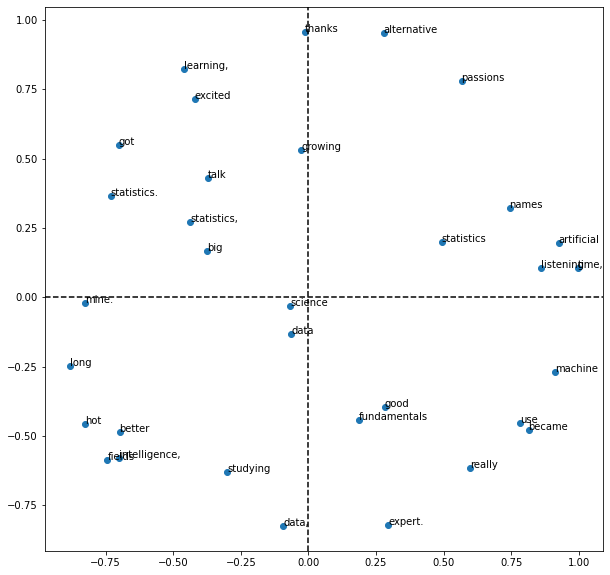

In [177]:
plt.figure(figsize=(10,10))
plt.scatter(Transf_Embeddings[:,0], Transf_Embeddings[:,1])
for index,Row in enumerate(Transf_Embeddings):
    plt.text(Row[0], Row[1], str(Target_Words[index]))
plt.axvline(0, color='k', linestyle='--', alpha=1)
plt.axhline(0, color='k', linestyle='--', alpha=1)